# Visualization Practice from "The Data Science Handbook"

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt 
import sklearn.datasets 

# this is just to get the iris data 
def get_iris_df():
    ds = sklearn.datasets.load_iris()
    df = pd.DataFrame(ds['data'],columns = ds['feature_names'])
    code_species_map = dict(zip(range(3), ds['target_names']))
    df['species'] = [code_species_map[c] for c in ds['target']]
    return df
df = get_iris_df()

df.head()

In [ ]:
#The code to generate a basic pie chart using Pandas is very simple: 
# gets sum by species 
sums_by_species = df.groupby('species').sum()

# this is the label, will be used as key
var = 'sepal width (cm)'

# initializes the plotVisualization
sums_by_species[var].plot(kind = 'pie', fontsize = 20)

# set the y label 
plt.ylabel(var, horizontalalignment='left')

# make a title 
plt.title('Breakdown for ' + var, fontsize=25)
# this is if you want to save it
#plt.savefig('iris_pie_for_one_variable.jpg')
#plt.close()

plt.show()

In [ ]:
# 

# get the same sum
sums_by_species = df.groupby('species').sum()

# remeber this will be a key
var = 'sepal width (cm)'

# make subplots in a 2x2
sums_by_species.plot(kind = 'pie', subplots = True, layout = (2,2))

plot.title("Breakdown of What have you", fontsize = 20)


In [ ]:
# get the same sum
sums_by_species = df.groupby('species').sum()

# remeber this will be a key
var = 'sepal width (cm)'

# make subplots in a 2x2
sums_by_species.plot(kind = 'bar', subplots = True, layout = (2,2))
plot.title("Whatever", fontsize = 12)

In [ ]:

for spec in df['species'].unique():          # setosa, versicolor, virginica is all
    forspec = df[df['species'] == spec]      # basically get the stats for each species like its own df
    forspec ['petal length (cm)'].plot(kind = 'hist', alpha = 0.4, label = spec)     # add it to a chart 
plt.legend(loc = 'upper right')              # add a legend
plt.suptitle("PLBS bitches")                 # add a title 

In [ ]:
import math

a = [[11,2,4],[4,5,6],[10,8,-12]]

location = 0
total = 0

def abs_diff_diagonal_sums(AoA):
    total = 0
    index = 0
    for array in AoA:
        total += array[index]
        index += 1

    total = 0 
    index = 1
    for array in AoA:
        total += array[-index]
        index += 1
        
    return abs(primary_diagonal(AoA) - secondary_diagonal(AoA))

abs_diff_diagonal_sums(a)

In [ ]:
def abs_diff_diagonal_sums(a):
    n = len(a)
    x = sum(a[i][i] for i in range(n))
    y = sum(a[i][n-i-1] for i in range(n))
    return abs(x-y)
abs_diff_diagonal_sums(a)

In [ ]:
arr = [-4, 3, -9, 0, 4, 1]         


def pn0(array):
    size = len(array)
    pos_count = 0
    neg_count = 0
    zero_count = 0
    
    for n in array:
        if n < 0:
            neg_count += 1
        elif n > 0:
            pos_count += 1
        else:
            zero_count += 1
            
    print(round(pos_count/size, 6))
    print(round(neg_count/size, 6))
    print(round(zero_count/size, 6))

pn0(arr)

In [113]:
#def staircase(n):



n = 15



def staircase(n):
    y = 1
    for i in range(n):
        stair = (" " * (n - 1)) + ("#" * y) 
        print(stair)
        n -= 1
        y += 1
        
staircase(n)

              #
             ##
            ###
           ####
          #####
         ######
        #######
       ########
      #########
     ##########
    ###########
   ############
  #############
 ##############
###############


/home/thadryan/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


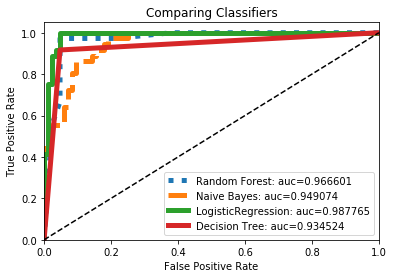

In [118]:
from matplotlib import pyplot as plt
import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# name -> (line format, classifier)
CLASS_MAP = {
    'LogisticRegression':
        ('-', LogisticRegression()),
    'Naive Bayes': ('--', GaussianNB()),
    'Decision Tree':
        ('.-', DecisionTreeClassifier(max_depth=5)),
    'Random Forest':
        (':', RandomForestClassifier(
            max_depth=5, n_estimators=10,
            max_features=1)),
}
# Divide cols by independent/dependent, rows by test/ train
X, Y = df[df.columns[:3]], (df['species']=='virginica')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.8)
for name, (line_fmt, model) in CLASS_MAP.items():
    model.fit(X_train, Y_train)
    # array w one col per label
    preds = model.predict_proba(X_test)
    pred = pd.Series(preds[:,1])
    fpr, tpr, thresholds = roc_curve(Y_test, pred)
    auc_score = auc(fpr, tpr)
    label='%s: auc=%f' % (name, auc_score)
    plt.plot(fpr, tpr, line_fmt,
        linewidth=5, label=label)
plt.legend(loc="lower right")
plt.title('Comparing Classifiers')
plt.plot([0, 1], [0, 1], 'k--') #x=y line.  Visual aid
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [131]:
#from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier(max_depth = 5)
#clf.fit([indep_cols, train.breed])
#predictions = clf.predict(test[indep_cols])

## will get 5 random cases 
#digits.sample(5)

In [180]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


iris = get_iris_df()

X_train, X_test, y_train, y_test = train_test_split(iris, iris.species, test_size=0.2)

clf = DecisionTreeClassifier(max_depth = 5)

fit = clf.fit(X_train, Y_)

ValueError: could not convert string to float: 'versicolor'